## Pesticide Mass


### Mass sink (z = 0)

- Degradation
- Volatilization
- Leaching
- Runoff
- Artificial Drainage 

In [1]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [2]:
PC = False
version = "v10"
folder = "1"

In [3]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


## Contribution to: 

In [4]:
sinks = "z0_Sinks"

In [6]:
components = ["APP", "VOL", "RO", "LCH", "DEG"] 
outlet_cont = ["BF", "ADR", "RO"] # To add "Cell outlet LF" 
pallete = ["#F44336", '#673AB7', '#3F51B5', '#009688', '#FF9800', '#4CAF50', '#03A9F4']
# red, purple, indigo, teal-green, orange, green, light-blue

In [7]:
# Simulated data
sim_list = []

# Time series name
fraction = "_L"
col = 'sim'

for i in range(len(components)):
    name_tss = components[i] + fraction
    filename = "resM_acc" + name_tss + ".tss"
    sim = pd.read_table(sim_path + folder + back + filename, 
                                skiprows=4, delim_whitespace=True,
                                names=['Jdays', col],
                                header=None)
    sim_list.append(sim[col].tolist())

## Plotting

In [8]:
# Julian days
# x = s_obs.Jdays.tolist()
dates = getTime(sep=";")
x = dates.Date.tolist()

start = 175
end = 300

In [9]:
# Add sim lines to data
data = []
for i in range(len(components)):
    pobj = go.Scatter(
        x = x[start:end],
        y = sim_list[i][start:end],
        mode = 'lines',
        name = components[i] + " Sim.",
        marker=dict(color=pallete[i]))
    data.append(pobj)

In [10]:
# Layout
layout = go.Layout(
    title='Sinks to top 1cm Soil',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title=r'$g.~S-met$',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [13]:
%matplotlib inline
import plotlycred
figname = sinks + fraction + '.png'

online = True
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data, layout=layout)
    py.image.save_as(fig, filename=figname)
else:
    iplot(data)


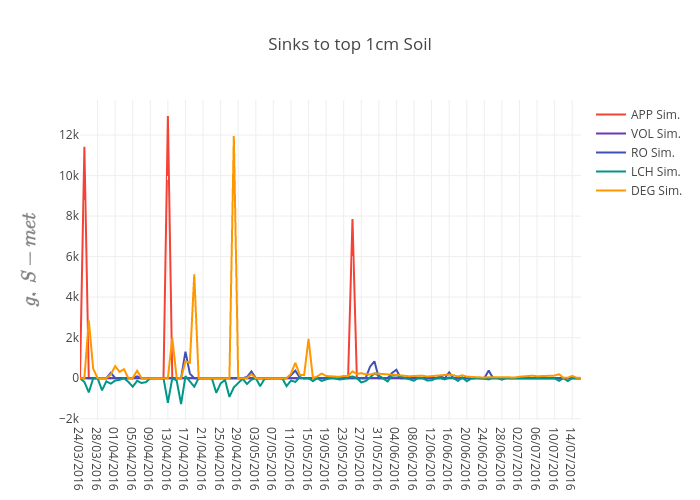

In [14]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)